<a href="https://colab.research.google.com/github/Thuoq/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow-2nd-Edition/blob/main/10_Introduction_to_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building an Image Classifier Usign Sequential API

#### Using Keras to load the dataset

In [58]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [59]:
fashin_minst = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashin_minst.load_data()


Khi chúng loading MNIST or Fasshion MNIST sử dung Keras thay vì Scikit-Learn, 1 điểm khác biệt ở đây là mỗi hình ảnh sẽ đại diện là 28x28 thay vì 1 array 784D. và pixel từ 0->255 thay vì float như scikit learn

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

Nhớ rằng vì tập dữ liệu là thường split into test_set và và training set, chúng ta cần tạo validation test. và chia cho 255.0 để chuyển sao float 

In [5]:
X_valid , X_train = X_train_full[:5000] / 255.0,X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]


Creating 1 class_name make the name of class

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

##### Creating the mode using Sequntial API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

## From biological to Artificial Neurons

## The Multilayer Perceptron and Backpropagation
**Định nghĩa**: An MLP là tổng hợp đi qua nhiều input layers, 1 hoặc nhiều TLU layers trong đó, finaly layers đc gọi input còn bên trong được gọi là hidden layers, và mỗi hidden layers đều có thêm thằng bias nữa, 

**Note**: Dòng tín hiệu từ input -> output chỉ 1 đường được gọi là  *Feedforward Neural Network*

Định nghĩa: An MLP là tổng hợp đi qua nhiều input layers, 1 hoặc nhiều TLU layers  trong đó

Đó là cái kiến trúc nhưng làm sao để được train nó.1986, đã giới thiệu **backpropagation** cách khác của Gradient , sử dụng kỹ thuật hiệu quả sử dụng một kỹ thuật hiệu quả để tính toán các gradient tự động

Và có 1 điều họ thay đổi cái cách tính full connection bằng hàm logistic vì ntn mới sử dụng đc Gradient
1. hyperbolic tangent
2. Rectified Linear Unit

### Regresion MLPs 

1. Input neurons - Oneper input features
2. Hidden layers - Dựa trên problem, thường là 1 tới 5
3. neurons per hidden layers - 10 -> 100
4. Output is 1 perdiction dimention
5. Hidden activation: ReLU
6. Output activation thường thường là relu of softpluts , or logisc/tank
7. loss fnc huber(nếu có ngoại lệ) MSE or MAEE

### Classification MLPs 

Khác regression ở 1 vài chỗ ví dụ

1. Output layer activation Logistic
2. Loss func là cross entropy

## Building an Image Classifier Using the Sequential API

#### Using Keras to load the dataset 


In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

Khi loading MNIST hoặc Fashion MNIST sử dụng Keras thay vì Scikit-Learn, 1 cái sự khác biệt rằng tất cả các hình ảnh đại diện là 28x28 thay vì là 1 D arrat 784. Hơn nữa cái pixel đại diện từ 0->255 thay vì 0.0 -> 255.0

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

Vì chúng ta chuẩn bị train với neural networrk sử dụng Gradient, chúng ta phải scal the input featues. 

In [12]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]


Chúng ta cần 1 list của các class names để biết cái gì chúng ta đang làm việc hay nói cách khác dể biết out put nó là cái gì 


In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

#### Creating the model using the Sequential API
nào chúng ta cùng build 1 neural network. 

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


Nào chúng ta cùng sẽ cùng giải thích code ở trên line by line : 
1. Dòng đầu tiên chúng ta tạo 1 `Sequential` model. Đây là 1 loại của Keras model cho neural netwwork rằng chỉ bao gồm các lớp được xét tuần tự đó được gọi là. Sequential AP I
2. Tiếp theo chúng ta xây dựng layerss đầu tiên và thêm nó vào model. Đó là `Flatten` layerss nó có vào trò chuyển các input image thành 1D array. Nếu nó nhận input data X, nó tính `X.reshape(-1.1)`
Layer này không nâhnj 1 parameters nào , chúng ta nên chỉ đinh cái `input_shape`
3. Tiếp theo chúng ta thêm Desen hidden layers với 300 nerons. Nó sẽ sử dụng `ReLu` activation fnc. Khi nó nhận ip data nó sẽ tính fully connected 
4. Cuối cùng, chúng ta thêm a Dense có output layers với 10 nerons. sử dugnj softmax activation (bởi vì chúng ta cần loai trừ )

`summary()` methods của moddel sẽ hiển thị ra model's layerss, bao gồm các loại tên lay'rss và những numerr của parametres của chúng . 

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Nhớ rằng chúng **Dense** layes thường có rất nhiều parametters. Ví dụ the first hidden layer có 784x300 connection + weight 3000 bias -> là ra 235,500. Điều này mang lại cho mô hình khá nhiều tính linh hoạt để phù hợp với dữ liệu đào tạo, nhưng nó cũng có nghĩa là mô hình có nguy cơ bị overfitting, đặc biệt là khi bạn không có nhiều dữ liệu đào tạo. Chúng ta sẽ quay lại vấn đề này sau

Tất cả các parameters của một layer có thể truy cập sử dụng `get_weights()` và `set_weight()` methods. Cho 1 dense layer,

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [18]:
weights,biases = hidden1.get_weights()
weights,biases

(array([[ 0.0005345 ,  0.00498553, -0.04696542, ..., -0.05928578,
         -0.05497381, -0.00498167],
        [-0.03369472,  0.02008576,  0.04843073, ...,  0.05799256,
          0.01170295,  0.05574577],
        [-0.029352  , -0.04999067, -0.07065158, ...,  0.02025097,
         -0.0068943 ,  0.06516817],
        ...,
        [-0.01703921, -0.02488277, -0.05525932, ..., -0.00451799,
          0.04649175, -0.06104958],
        [-0.02767918,  0.02626684,  0.00692876, ..., -0.02400315,
         -0.03385001,  0.04598913],
        [-0.03571031, -0.01906472,  0.05766597, ..., -0.06856182,
          0.02119299,  0.04947263]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

#### Compiling the Model
Sau khi 1 model đã được tạo, bạn cần phải `compile()` chúng để chỉ định loss fnc và optimizer để sử dụng. chúng ta có thể tuỳ ý chỉ đihcj list metrics để tính trong suất huấn luyện và evaluation:

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


Code ở trên chúng ta cùng giải thích 1 chút nhé. 
1. chúng ta sử dụng "sparse_categorical_crosentropy" lss bởi vì chúng ta đang làm phân loại cho mỗi lớp khác biệt. Nếu chúng ta sử dụng binarry classification  chúng ta có thể sử dụng **"sigmoid"** activation trong output thay vì  **"softmatx"** activation , và chúng ta sử dụng loss fnc là **"binary_crossentropy"**

#### Trainning and evaluating the model 


In [22]:
history = model.fit(X_train,y_train
                    ,epochs=30
                    ,validation_data=(X_valid,y_valid)
                    )

Epoch 1/30
1719/1719 [==============================] - 7s 2ms/step - loss: 0.7001 - accuracy: 0.7692 - val_loss: 0.5243 - val_accuracy: 0.8152
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4824 - accuracy: 0.8325 - val_loss: 0.4343 - val_accuracy: 0.8574
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4385 - accuracy: 0.8469 - val_loss: 0.3999 - val_accuracy: 0.8644
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4114 - accuracy: 0.8565 - val_loss: 0.4033 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3916 - accuracy: 0.8624 - val_loss: 0.3736 - val_accuracy: 0.8722
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8680 - val_loss: 0.3756 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3652 - accuracy: 0.8704 - val_loss: 0.3583 - val_accuracy:

Chúng ta pass validation sett(đây là option). Keras sẽ meassure the los and metrics on this test tại cuối của mỗi epoch, nó rất good để nhìn xem hiệu xuất.
1. Nếu performane trên tập huấn luyện tốt hơn validation thì là overfitting 

Nếu tập huấn luyện khá bị lệch, một vài class đã được đại diện nhiều hơn nó có thể rất tốt hữu ích để set `class_weight` argument khi calling fit method.điều này sẽ tạo ra trọng số lớn hơn cho các nhóm đại diện ít và trọng số thấp hơn cho các nhóm đại diện quá . Các weights đó sử dụng bởi Keras khi tính the loss, néu bạn cần, mỗi per-instance weight hãy đặt `sample_weight` arguments.


Khi chúng ta có `fit()` methods nó sẽ trả về một History object 
1. (`history.paramse`) bao gồm tập huấn luyện parameters 
2. (`history.epoch`) list của epochs trong khi nó chạy
3. quan trọngk alf history.history bao gồn los và thêm cả metriss nó meassured tại end epoch trên tập huấn luyện và trên validation set



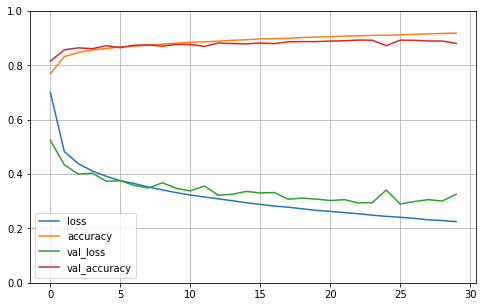

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set y coordinate range to (0,1)
plt.show();

Bạn có thể nhìn cả 2 training accuracy and validation accuracy tăng đều đặn trong quá trình đào tạo , trong khi 2 cái kia nó giảm xuống. 

Thêm nữa validation curves thường gần với trainning curves, điều đó có nghĩa rằng là nó ko quá overfitting. 

**TIP**:When plotting the training curve, it should be shifted by half an epoch to the left.

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 94.4273 - accuracy: 0.8059


[94.42727661132812, 0.805899977684021]

Hay nhớ chống lại sự cám dỗ để điều chỉnh các siêu tham số trên bộ thử nghiệm, nếu không, ước tính của bạn về sai số tổng quát sẽ quá lạc qua

#### Using the model to make prediction 

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Nếu chúgn ta chỉ quan tân cái class mà có highest estimated probability ngay cả khi xác xuất của nó khác thất chúng ta có thể sử dụng `predict_classes()` methods instead:


In [26]:
import numpy as np


In [27]:
np.argmax(y_proba,axis=1) # take best value 

array([9, 2, 1])

In [28]:
np.array(class_names)[np.argmax(y_proba,axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## BUilding a Regression MLP Using the Sequential API 

nào chúng  ta California housing problem và sử dụng Neural network. Đơn giản, chúng ta sử dụng Sciki-Learn's `fea_california_housing()` load data. Dataset là đơn giản hơn chúng ta sử dụng, vì nó chỉ bao gồm các numerial featues. và k có mising valuie nhưng chúng ta đã bàn

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Fetch the data set
housing = fetch_california_housing()
# split data to train_full and test set
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
# split train_full  to train and valid set                                                 ,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)
# make Standardization preprocessing
scaler = StandardScaler()
# train from X set
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)


In [30]:
X_train.shape

(11610, 8)

In [31]:
X_train.shape[1:]

(8,)

Sử dụng Sequential API để xây dựng , và evaluate, và sử dụng MLP regression để dự đoán vì data k quá compilex nên chúng ta không cần phải sử dụng quá nhiều neurons như lúc trước để tránh overfitting. 

In [32]:
tf.random.set_seed(42)
# 1. Creating a model
model = keras.models.Sequential([
                                 keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])
# 2. Compiling model

model.compile(loss="mean_squared_error"
              ,optimizer="sgd"
              ,metrics=['mse'])
# 3. Fitting the model
history = model.fit(X_train
                    ,y_train
                    ,epochs=20
                    ,validation_data=(X_valid,y_valid))
# 4. Evaluating model
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7237 - mse: 0.7237 - val_loss: 1.0052 - val_mse: 1.0052
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8186 - mse: 0.8186 - val_loss: 0.4939 - val_mse: 0.4939
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4415 - mse: 0.4415 - val_loss: 0.4684 - val_mse: 0.4684
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4149 - mse: 0.4149 - val_loss: 0.6618 - val_mse: 0.6618
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4102 - mse: 0.4102 - val_loss: 0.4339 - val_mse: 0.4339
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - mse: 0.4152 - val_loss: 0.4326 - val_mse: 0.4326
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4171 - mse: 0.4171 - val_loss: 0.4246 - val_mse: 0.4246
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

array([[2.0164127],
       [6.1503987],
       [1.7670097]], dtype=float32)

Như bạn đã thấy, the Sequential API khá là dễ để sử dụng, Tuy nhiên **Sequential** model là rất chugn chung nó thường rất hữu ích để xây dưungj neural netwworkds với cấu trúc liên kết nó quá phức tạp. Vì mục đích này, Keras cung cấp **Functional API**

## Building Complex Models Using the Functional API
Một ví dụ về  1 nonsequential neurral networks laf Wide & Deep neural netwwork. Đây là 1 kiến trúc mạng neral bởi 2016.Nó kết nối tất cả hoặc 1 phần của input ngay lập tức tới phần output layer. Kiến trúc nào có thể cho mạng neural để lơn cả 2 deep patterns. 

Chúng ta cùng build 1 neural netwwork để chưsng minh nó

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(input_)
concat = keras.layers.Concatenate()([input_,hidden2])

output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

Nào chúng ta cùng giải thích code ở trên nhé
1. Đầu tiên chúng ta tạo 1 object Input thông số mà input nhận được bao gồm **shape** và **dtype**. Một model có thể có nhiều inputs 
2. Tiếp theo, chúng ta tạo 1 Dense layer với 30 neurons, sử dụng ReLu activation function. Ngay khi nó đã tạo, nhớ rằng chúng ta call nó như 1 func và pasinh nó là input đó là tại sao nó được gọi là **Function API**. Nhớ rằng chúng ta chỉ nói với Keras làm thế nào nên kết nối layers toggerthe, chưa có thực sự data trong quá trình 
3. Chúng ta tạo cái hidden layer thứ 2, và chúng ta sử dụng func tiếp, Nhớ rằng chúg ta truyền nó là output của firrst layer 
4. Tiếp đến chúng ta tạo **Concatenate** laye, và một lần nữa chúng ta ngay lập tứ sử dụng như function. để nối input và output secon hidden layer, bạn có thể thích sử dụng `keras.layers.concatenate(input_here)`
5. Rồi chúng ta tạo 1 output layer với single neuron và ko có activation function và hcusng gọi nó như 1 func và truyền nó kết quả của **concatenation**

In [34]:
# 2. Compiling model

model.compile(loss="mean_squared_error"
              ,optimizer="sgd"
              ,metrics=['mse'])
# 3. Fitting the model
history = model.fit(X_train
                    ,y_train
                    ,epochs=20
                    ,validation_data=(X_valid,y_valid))
# 4. Evaluating model
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7446 - mse: 0.7446 - val_loss: 2.8264 - val_mse: 2.8264
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 15.0664 - mse: 15.0664 - val_loss: 11.4746 - val_mse: 11.4746
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 4.9132 - mse: 4.9132 - val_loss: 42.2524 - val_mse: 42.2524
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: na

array([[nan],
       [nan],
       [nan]], dtype=float32)

Giả sử nếu chúng ta muốn gửi 1 subset features qua các wide path và 1 differn subset **wide path và 1 different subsep** hãy nhìn ở dưới:

In [35]:
# 1. Creating 1 model 
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=[output])

Cái code ở trên cũng dã tự giản và chúng ta có thể làm bước 2 **compile** như bình thường nhưng đến chỗ **fit** thì chúng ta phải tách ra X_train_A, và X_train_B. và the same  cho evaluate và validation vì chúng ta tách thành 2 output mà

In [36]:
some_test_concat = [1,2,3,4,5,6,7,8]
some_test_concat[:5],some_test_concat[2:]

([1, 2, 3, 4, 5], [3, 4, 5, 6, 7, 8])

In [37]:
# 2. Compiling the model
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B  = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A , X_new_B = X_test_A[:3],X_test_B[:3]
history=  model.fit((X_train_A,X_train_B)
                ,y_train
                ,epochs=30
                ,validation_data = ((X_valid_A,X_valid_B),y_valid))
mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A,X_new_B))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.0587 - val_loss: 0.9427
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8178 - val_loss: 0.7052
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6809 - val_loss: 0.6421
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6298 - val_loss: 0.6097
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6000 - val_loss: 0.5876
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5777 - val_loss: 0.5701
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5601 - val_loss: 0.5578
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5456 - val_loss: 0.5472
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5336 - val_loss: 0.5391
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5231 - val_loss: 0.5328

Có nhiều trường hợp sử dụng mà bạn có thể muốn có nhiều đầu ra
1. Ví dụ chúng bạn có thể tìm chính xác địa điểm của phân loại của ảnh, và phân loại nó
2. Bạn có thể có nhiều task đọc lập dựa tren cùng 1 loại dữ liệu, bạn có thể huấn luyện 1 neural network per task, nhưng trong nhiều trường hợp bạn sẽ nhận được kết quả tốt hơn trên tất cả cá task đc training bởi 1 single mạng neural với 1 out put trên 1 task. Đól à boiwr vì mạng nở ron có thể learn features trong đa ta trên nhiều task. Bạn có thể xử lý mutiple tas classification trên hình ảnh khuôn mặt sử dụng 1 output phân loại người ví dụ như cười hay ngạc nhiên 1 cáci khác chỉ định là có đeo kính hay k
3. Một trường hợp sử dụng khác là như một kỹ thuật chính quy hóa (tức là một ràng buộc đào tạo có mục tiêu là giảm việc trang bị quá mức và do đó cải thiện khả năng tổng quát hóa của mô hình). Ví dụ: bạn có thể muốn thêm một số đầu ra phụ trợ trong kiến trúc mạng nơ-ron để đảm bảo rằng phần bên dưới của mạng tự học được điều gì đó hữu ích mà không cần dựa vào phần còn lại của mạng. 

Thêm 1 outputs nữa khác là dễ dàng chỉ cần connect chúng với layers của chúng ta là xong 

In [38]:
# 1. Creating 1 model 
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
aux_output = keras.layers.Dense(1,name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

MỖi output có cần mỗi chính nó los fnc vì vậy khi chúng ta compiling model chúng ta cần pas list của loses Chúng ta quan tâm nhiều hơn main output hơn auxiliarry outt put, vì chúng ta muốn main output loss hơn weight THật may chúng ta có thế set loss weights  


In [39]:
model.compile(loss=['mse','mse'],
              loss_weights=[0.9,0.1]
              ,optimizer='sgd')

baay gioc húng ta  training model, chúng ta cần cung cấp labesl cho mỗi out put 

In [40]:
history = model.fit([X_train_A,X_train_B]
                    ,[y_train,y_train]
                    ,epochs=20
                    ,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))


Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.9174 - output_loss: 0.7810 - aux_output_loss: 2.1446 - val_loss: 0.6015 - val_output_loss: 0.5288 - val_aux_output_loss: 1.2565
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5501 - output_loss: 0.4814 - aux_output_loss: 1.1678 - val_loss: 0.5428 - val_output_loss: 0.4840 - val_aux_output_loss: 1.0722
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5472 - output_loss: 0.4981 - aux_output_loss: 0.9892 - val_loss: 0.6111 - val_output_loss: 0.5732 - val_aux_output_loss: 0.9515
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4908 - output_loss: 0.4488 - aux_output_loss: 0.8679 - val_loss: 0.6363 - val_output_loss: 0.6059 - val_aux_output_loss: 0.9105
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4904 - output_loss: 0.4573 - aux_output_loss: 0.7878 - val_loss: 0.4826 - val_output_loss: 0.4496 - val_aux_

Khi chusng ta `evaluate` model, keraas sex returntotal loss cũng như các losxx còn lại 


In [41]:
total_loss ,main_loss,aux_loss = model.evaluate([X_test_A,X_test_B]
                                                ,[y_test,y_test])
print(f"The total loss: {total_loss}, main_loss: {main_loss}, aux_loss: {aux_loss}")

162/162 [==============================] - 0s 2ms/step - loss: 4.2807 - output_loss: 4.3655 - aux_output_loss: 3.5172
The total loss: 4.280667304992676, main_loss: 4.365500450134277, aux_loss: 3.5171782970428467


Giống như trên, the `predict()` cũng sẽ return predictions cho mỗi output:


In [42]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main

array([[2.0230756],
       [5.879576 ],
       [2.6791244]], dtype=float32)

In [43]:
y_pred_aux

array([[1.7407196],
       [5.679032 ],
       [2.9906013]], dtype=float32)

Như chúng ta đã thấy chúng ta có thể build bất kỳ cấu trúc nào chúgn ta sử dụng Function API

## Using the Subclass API to Build Dynamic Models

Cả 2 Sequential API và Functional API là khai báo, bạn bắt đầu khai báo bới cái layer nàob mà bạn muốn sử dụng và chúng nên connect và chỉ khi đó, bạn mới có thể bắt đầu cung cấp cho mô hình một số dữ liệu để đào tạo hoặc suy luận. Có rất nhiều. Nhưng mặt trái của nó là static. Để muốn Dynamic hơn , thì Subclassing API sẽ dành cho bạn  

Đơn giản subclass the Model class, tạo  các lớp mà bạn cần trong constructor, và sử dụng chúng cho xử lý và tính toán bặn có sử dụng `call() ` dưới đây là ví dụ

In [44]:
class WideAndDeepModel(keras.Model):
  def __init__(self,units=30,activation="relu",**kwargs):
    super().__init__(**kwargs) # handles standard args
    self.hidden1 = keras.layers.Dense(units=units,activation=activation)
    self.hidden2 = keras.layers.Dense(units=units,activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
  def call(self,inputs):
    input_A,input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A,hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output,aux_output
model = WideAndDeepModel()


Code ở trên rất giống như thằng Functional API  ngoại trừ chúng ta không cần tạo inputs và chúng ta sử dụng input argument to `call()` method. Điểm khác biệt lớn nhất ở đây rằng bạn có thể làm những gì bạn muốn trong `call()` methods . Đây là 1 cái greate API cho nghiên cứ của experimenting với nhiều ý tưởng điên rồ 

Cái flexible nào cũng có mặt hại của nó,  kiến trúc  model  của chúng ta m là hidden trong call method(), vì đó Keras không dễ dàn kiểm tra nó, nó không thể lưuu hoặc clone it, và khi nó gọi `summary`  method, nó chỉ lấy được danh sách layer, ngoại trừ bất kỳ thông tin trên làm sao để chúng ta kết nối được chúng. Moreover. Keras không thể kiểu tra types vvaf shape ở ngay đầu, nó có thể gây ra lỗi đầu. Vì vậy, trừ khi bạn thực sự cần sự linh hoạt bổ sung đó, bạn có thể nên sử dụng Sequential API hoặc Functional APi

## Saving and Restoring a Model

Khi bạn sử dụng Sequential API hoặc FUnctionAPI, saving của 1 model Keras đã traiin là dễ dàng 

**chỉ cần**


```
model.save("my_keras_model.h5.")
```



In [45]:
tf.random.set_seed(42)
# 1. Creating a model
model = keras.models.Sequential([
                                 keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])
# 2. Compiling model

model.compile(loss="mean_squared_error"
              ,optimizer="sgd"
              ,metrics=['mse'])
# 3. Fitting the model
history = model.fit(X_train
                    ,y_train
                    ,epochs=20
                    ,validation_data=(X_valid,y_valid))
# 4. Evaluating model
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
# 5. Saving model 
model.save("my_keras_model.h5")

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7237 - mse: 0.7237 - val_loss: 1.0052 - val_mse: 1.0052
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8186 - mse: 0.8186 - val_loss: 0.4939 - val_mse: 0.4939
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4415 - mse: 0.4415 - val_loss: 0.4684 - val_mse: 0.4684
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4149 - mse: 0.4149 - val_loss: 0.6618 - val_mse: 0.6618
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4102 - mse: 0.4102 - val_loss: 0.4339 - val_mse: 0.4339
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - mse: 0.4152 - val_loss: 0.4326 - val_mse: 0.4326
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4171 - mse: 0.4171 - val_loss: 0.4246 - val_mse: 0.4246
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

## Using CallBacks
The `fit()` method có thể chấp nhận 1 call back argument thằng như 1 list của 1 dối thượng. nó sẽ gọi ngai khi start và end của trianing. At the start and end của mỗi eachpo, và thậm chí trước và sau khi xử lý each batch.
 Ví dụ dưới đây the `ModelCheckPoint` call back saves checkpoinst của model của trúng ta 

In [46]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train,y_train,epochs=10,callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3544 - mse: 0.3544
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3870 - mse: 0.3870
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3458 - mse: 0.3458
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3432 - mse: 0.3432
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3463 - mse: 0.3463
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3474 - mse: 0.3474
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3403 - mse: 0.3403
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3373 - mse: 0.3373
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3400 - mse: 0.3400
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3431 - mse: 0.3431


Thêm nữa, nếu bạn sử dụng a validation set xuyên suốt durirng training, bạn có thể cài dặt `save_best_only = True` khi bạn tạo ModelCheckpoin. Trong trường hợp này, nó sẽ chỉ save yourr model khi nó peformance của validation set là tốt nhất. 

In [47]:
checkpoint_cb= keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                               save_best_only=True)
history = model.fit(X_train
                    ,y_train
                    ,epochs=10
                    ,validation_data=(X_valid,y_valid)
                    ,callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3366 - mse: 0.3366 - val_loss: 0.3827 - val_mse: 0.3827
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3504 - mse: 0.3504 - val_loss: 0.3828 - val_mse: 0.3828
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3325 - mse: 0.3325 - val_loss: 0.3832 - val_mse: 0.3832
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3311 - mse: 0.3311 - val_loss: 0.4033 - val_mse: 0.4033
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3327 - mse: 0.3327 - val_loss: 0.3819 - val_mse: 0.3819
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3310 - mse: 0.3310 - val_loss: 0.3840 - val_mse: 0.3840
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3398 - mse: 0.3398 - val_loss: 0.3775 - val_mse: 0.3775
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.

Một cách khác để xử lý là sử dụng early stopping để sử dụng EarlyStopping cb. Đặc điểm của cái này là Nó sẽ làm gián đoạn quá trình đào tạo khi nó không đo lường được tiến bộ nào trên bộ xác thực cho một số kỷ nguyên định nghãi bởi patience arguement. Nó sẽ là optionall rôlback to the best model. 

In [48]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train
                    ,y_train
                    ,epochs=100,validation_data=(X_valid,y_valid),
                    callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3378 - mse: 0.3378 - val_loss: 0.3834 - val_mse: 0.3834
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.3802 - val_mse: 0.3802
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3382 - mse: 0.3382 - val_loss: 0.3987 - val_mse: 0.3987
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3295 - mse: 0.3295 - val_loss: 0.4143 - val_mse: 0.4143
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3282 - mse: 0.3282 - val_loss: 0.3779 - val_mse: 0.3779
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3267 - mse: 0.3267 - val_loss: 0.3796 - val_mse: 0.3796
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3795 - mse: 0.3795 - val_loss: 0.3891 - val_mse: 0.3891
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - 

The number cuar epch có thể set to lớn value vì trainig sẽ dường lại khi nó thấy k còn quá trình nữa. trong trường hợp này không cầu restore the best model save bởi vì early stiopping call để tìm kiếm best weights và restore chúng ở cuối cùng

Nếu bạn cần thêm các điều khiển, bạn có thê dễ dàng viết custom callbacks hiển thị chúng xuyến xuống trainign set 

In [49]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [50]:
history = model.fit(X_train
                    ,y_train
                    ,epochs=100,validation_data=(X_valid,y_valid),
                    
                    callbacks = [checkpoint_cb,early_stopping_cb,PrintValTrainRatioCallback()])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3030 - mse: 0.3030 - val_loss: 0.3603 - val_mse: 0.3603

val/train: 1.19
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3019 - mse: 0.3019 - val_loss: 0.3538 - val_mse: 0.3538

val/train: 1.17
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3020 - mse: 0.3020 - val_loss: 0.3536 - val_mse: 0.3536

val/train: 1.17
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3008 - mse: 0.3008 - val_loss: 0.3551 - val_mse: 0.3551

val/train: 1.18
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3025 - mse: 0.3025 - val_loss: 0.3613 - val_mse: 0.3613

val/train: 1.19
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3033 - mse: 0.3033 - val_loss: 0.3596 - val_mse: 0.3596

val/train: 1.19
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3038 - mse: 0.3038 - va

## Using TensorBoard for Viz

# Fine-Tuning Neural Network Hyperparameters
Một trong những tính linh hoạt của neural networks cũng là 1 nhược điểm chính của bạn nó có quá nhiều hyperparrametesr để được điều chính.

1 OPtion là chỉ đơn giản sử dụng thật nhièu cái combinations của hyperparametse và chọn cái best nhất như chúng ta đã làm ở validation set. ví dụ như là GridSearchCV hoặc RandomizedSearchCV để tìm kiếm hyperparameters như chúng ta đã làm. để làm được cái nàhy chúng ta cần phải waráp cái KEras model trong object giống thằng Scikit

In [51]:
def build_model(n_hidden=1,n_neurons=30,learning_rate = 3e-3,input_shape=[8]):
  """
  Build model flexible make using GridSearchCV or randomize Search CV
  """
  # 1. Creating a model
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons,activation='relu'))
  model.add(keras.layers.Dense(1))
  # 2. Compiling model 
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss="mse",optimizer=optimizer)
  return model


In [52]:
# Chusng t sẽ tạo 1 **KerasRegressor** dựa trên build_model()
keras_reg=  keras.wrappers.scikit_learn.KerasRegressor(build_model)


Giowf KerasRegressor Object là  đã bao gồm ảound Kẻas model sử dụng build_model(). Vì chúng ta không chỉ định bất kỳ hyperaparament khi chúng ta tạo hết nó chỉ sử dụng những cái parametewr dèaul 

In [53]:
keras_reg.fit(X_train,y_train,epochs=100
              ,validation_data=(X_valid,y_valid)
              ,callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test,y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0771 - val_loss: 0.5684
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5491 - val_loss: 0.5223
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5074 - val_loss: 0.4996
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4816 - val_loss: 0.4879
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4661 - val_loss: 0.4741
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4526 - val_loss: 0.4659
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4447 - val_loss: 0.4621
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4367 - val_loss: 0.4576
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4317 - val_loss: 0.4579
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4271 - val_lo

Nhớ rằng bất kì parameter chúng ta pass tròn `fit()` method bạn sẽ truyền xuống dưới Keras model. cũng nhớ rằng score chính là ngược lại với MSE bởi vì SCikirt-Learn muốn scores không muông loses 

In [54]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
parram_distribs = {
    "n_hidden" : [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4,3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg,parram_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=100,
                  validation_data=(X_valid,y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8604 - val_loss: 0.5775
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5369 - val_loss: 1.8763
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.6632 - val_loss: 22.7248
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 13.3854 - val_loss: 346.8712
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 143.6692 - val_loss: 5304.4326
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 50194.1094 - val_loss: 80856.4375
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 490349.6875 - val_loss: 1419180.2500
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 10947239.0000 - val_loss: 19473216.0000
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 143755184.0000 - val_loss: 292636704.0000
Epoch 10/100
242/242 [===========

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7faa44ee23d0>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faa44d8e890>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 1...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_

In [55]:
rnd_search_cv.best_params_


{'learning_rate': 0.009362624718789044, 'n_hidden': 3, 'n_neurons': 65}

In [56]:
rnd_search_cv.best_score_

-0.30625348289807636

In [57]:
model = rnd_search_cv.best_estimator_.model